# HR diagram

Star classification is something that can be done based on rules depending on temperature and luminosity, e.g. the Hertzsprung-Russell diagram.

We load a star catalogue of 240 stars collected by Deepraj Baidya. It contains several information:

1. Temperature (in Kelvin)
2. Luminosity (L/Lo)
3. Radius (R/Ro)
4. Absolute magnitude (Mv)
5. Color (Red/Orange/Yellow/White/Blue)
6. Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
7. Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)


In [1]:
import numpy as np
from scipy import stats, interpolate
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [7, 7]


import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x25015839a60>)

In [2]:
import pandas as pd
df_stars = pd.read_csv("stars.csv")

In [3]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


There are 6 star types that are encoded in the 'Star type' column. These labels are currently encoded as strings which is practical for reading but not for computing. Using scikit-learn, we will convert this column into integers by assigning a unique int value to each star type.

In [4]:
df_stars.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [5]:
# Defining numerical variables
from sklearn.preprocessing import LabelEncoder

Temperature = np.array(df_stars.loc[:, 'Temperature (K)'])
Luminosity = np.array(df_stars['Luminosity(L/Lo)'])
Radius = np.array(df_stars['Radius(R/Ro)'])
Absolute_magnitude = np.array(df_stars['Absolute magnitude(Mv)']) 


le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels_star_type = le.inverse_transform(df_stars['Star type'])
class_names_star_type = le.classes_
print(class_names_star_type)

#le = LabelEncoder()
df_stars['Star color'] = le.fit_transform(df_stars['Star color'])
labels_star_color = le.inverse_transform(df_stars['Star color'])
class_names_star_color  = le.classes_
print(class_names_star_color)

#le = LabelEncoder()
df_stars['Spectral Class'] = le.fit_transform(df_stars['Spectral Class'])
labels_spectral_class = le.inverse_transform(df_stars['Spectral Class'])
class_names_spectral_class = le.classes_
print(class_names_spectral_class)

Star_type = df_stars['Star type'] 
Star_color = df_stars['Star color']
Spectral_class = df_stars['Spectral Class'] 


['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']
['Blue' 'Blue ' 'Blue White' 'Blue white' 'Blue white ' 'Blue-White'
 'Blue-white' 'Orange' 'Orange-Red' 'Pale yellow orange' 'Red' 'White'
 'White-Yellow' 'Whitish' 'Yellowish' 'Yellowish White' 'white'
 'yellow-white' 'yellowish']
['A' 'B' 'F' 'G' 'K' 'M' 'O']


In [6]:
#Removing eventually nan
Temperature=Temperature[~np.isnan(Temperature)]
Radius=Radius[~np.isnan(Radius)]
Luminosity=Luminosity[~np.isnan(Luminosity)]
Absolute_magnitude=Absolute_magnitude[~np.isnan(Absolute_magnitude)]

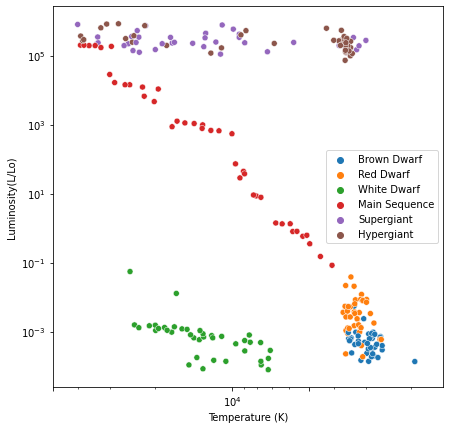

In [7]:
import seaborn as sns
import numpy as np
from scipy import stats, interpolate
from matplotlib import pyplot as plt

sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels_star_type)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars

## PCA with non treated data

Firstly we apply a PCA to non treated data, taking into account only the columns in the catalouge with real number, i.e. Temperature, Radius, Luminosity, and Absolute Magnitude.

In [8]:
from sklearn.decomposition import PCA

#data in sklearn syntax
X =  np.array([Temperature, Luminosity, Radius, Absolute_magnitude]).T

pca = PCA()
pca.fit(X)
star = pca.fit_transform(X)

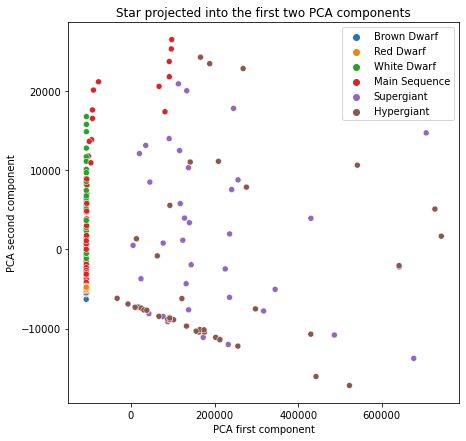

In [9]:
sns.scatterplot( x=star[:,0], y=star[:,1], hue=labels_star_type)
plt.xlabel('PCA first component')
plt.ylabel('PCA second component')
plt.title('Star projected into the first two PCA components')
plt.show()

This results looks terrible, it can be ascribed to the use of unscaled data. Let's see the first two principal components.

First PCA component: [ 2.09892192e-02  9.99778551e-01  1.51672530e-03 -4.06568779e-05]
Second PCA component: [ 9.99737574e-01 -2.09743948e-02 -9.20988063e-03 -1.91786135e-04]


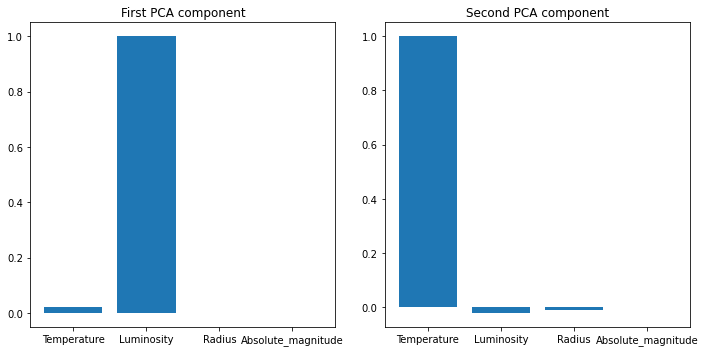

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
labels = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude']


labels = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude']
print('First PCA component:', pca.components_[0])
print('Second PCA component:', pca.components_[1])

ax1.bar(labels, pca.components_[0])
ax2.bar(labels, pca.components_[1])

ax1.set_title('First PCA component')
ax2.set_title('Second PCA component')

fig.tight_layout() 
plt.show()

Without a scaling of the data, Luminosity and Temperature have a huge weigths on PCA first two components.

## PCA after data preparing

The usual machine-learning approach is to standardize the data such that each dimension has mean=0 and variance=1. We follow this approach using sklearn StandardScaler.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
#pca_scaled = PCA(n_components=2)
pca_scaled = PCA()
pca_scaled.fit(X_scaled)
star_scaled = pca_scaled.fit_transform(X_scaled)

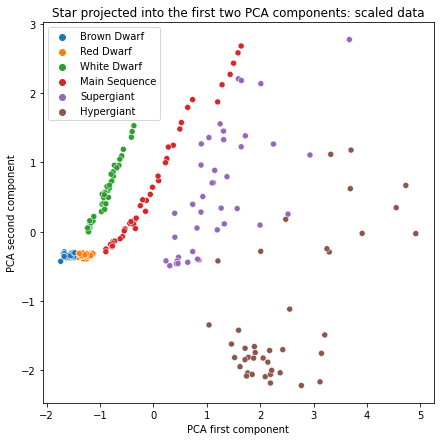

In [12]:
sns.scatterplot( x=star_scaled[:,0], y=star_scaled[:,1], hue=labels_star_type)
plt.xlabel('PCA first component')
plt.ylabel('PCA second component')
plt.title('Star projected into the first two PCA components: scaled data')
plt.show()

Now we can see a clear separation between the star classes. This two PCA components are unphysical but they gives more information about the data rather than the Temperature and Luminosity.

First PCA component: [ 0.35018343  0.55933789  0.47477107 -0.58232734]
Second PCA component: [ 0.82161262  0.00452564 -0.56898115  0.03453503]


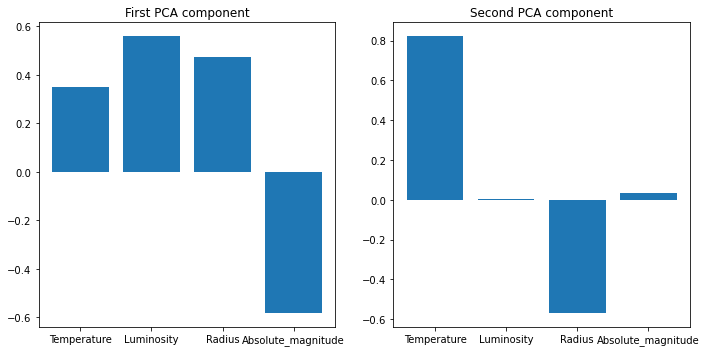

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
labels = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude']


labels = ['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude']
print('First PCA component:', pca_scaled.components_[0])
print('Second PCA component:', pca_scaled.components_[1])

ax1.bar(labels, pca_scaled.components_[0])
ax2.bar(labels, pca_scaled.components_[1])

ax1.set_title('First PCA component')
ax2.set_title('Second PCA component')


fig.tight_layout() 
plt.show()

Now the weigths are more equally distributed among all the physical quantities

Let's visualize the **Scree Plots** to see how much variance is explained as a function of eigenvector.

[0.60357391 0.23500784 0.09329645 0.0681218 ]


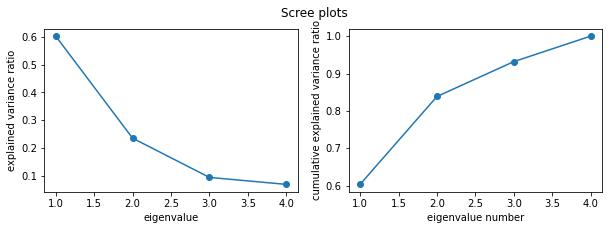

In [14]:
evals = pca_scaled.explained_variance_ratio_

print(evals)
n_components = 4
fig = plt.figure(figsize=(10, 3))


ax = fig.add_subplot(121)
ax.plot(np.arange(n_components)+1, evals)
ax.scatter(np.arange(n_components)+1, evals)
ax.set_xlabel("eigenvalue")
ax.set_ylabel("explained variance ratio")

ax = fig.add_subplot(122)
ax.plot(np.arange(n_components)+1, evals.cumsum())
ax.scatter(np.arange(n_components)+1, evals.cumsum())
ax.set_xlabel("eigenvalue number")
ax.set_ylabel("cumulative explained variance ratio")

plt.suptitle('Scree plots')

plt.show()

In [15]:
print('The first two components explain %.3f variance' % evals.cumsum()[1])

The first two components explain 0.839 variance


## Classification

Now I use a **Decision Tree** classifier, so a supervised algorithm. We use cross-validation to obtain the optimal depth for our tree.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
drange = np.arange(1,10)  

GS = GridSearchCV(clf, param_grid={'max_depth': drange}, cv=5, scoring = 'neg_root_mean_squared_error',  return_train_score=True)
GS.fit(star_scaled, Star_type )

optimal_depth = GS.best_params_['max_depth']
print('Optimal parameter: ', optimal_depth)
print(GS.best_estimator_)

Optimal parameter:  8
DecisionTreeClassifier(max_depth=8)


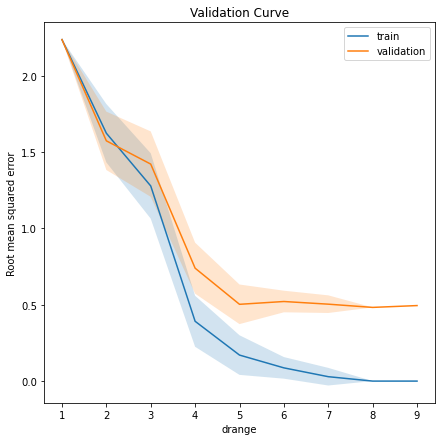

In [17]:
mean_train_score = -GS.cv_results_['mean_train_score']
mean_test_score = -GS.cv_results_['mean_test_score']

std_train_score = GS.cv_results_['std_train_score']
std_test_score = GS.cv_results_['std_train_score']
plt.plot(drange, mean_train_score, label = 'train')
plt.plot(drange, mean_test_score, label = 'validation')
plt.fill_between(drange, mean_train_score + std_train_score, mean_train_score - std_train_score, alpha=0.2 )
plt.fill_between(drange, mean_test_score + std_test_score, mean_test_score - std_test_score, alpha=0.2 )

plt.title('Validation Curve')
plt.xlabel('drange')
plt.ylabel('Root mean squared error')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(star_scaled, Star_type, test_size=0.3, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

dt = DecisionTreeClassifier(random_state=0, max_depth= optimal_depth, criterion='entropy') 
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_dt_det = accuracy_score(y_test, y_pred)

print("Accuracy for DTC using det as target: %.3f" %accuracy_dt_det)

Accuracy for DTC using det as target: 0.972


['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']
['BD', 'H', 'MS', 'RD', 'S', 'WD']


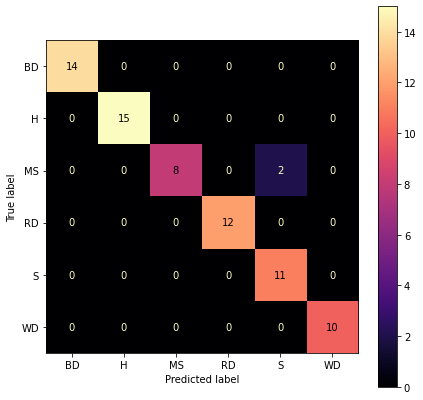

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(class_names_star_type)
class_acronym = ['BD', 'H', 'MS', 'RD', 'S', 'WD']
print(class_acronym)

Conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_matrix, display_labels=class_acronym)

disp.plot( cmap = 'magma')
plt.show()